In [7]:
import pandas as pd
from sklearn import svm
from sklearn.svm import SVR

In [8]:
data = pd.read_csv("Salary_Data.csv")

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
data.shape

(30, 2)

In [11]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
feature=data.iloc[:,0:1]
feature=feature.values.reshape(-1,1)
label=data['Salary']
label=label.values.reshape(-1,1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
feature = sc_X.fit_transform(feature)
label = sc_y.fit_transform(label)

In [14]:
reg = SVR()

In [15]:
reg.fit(feature,label)

E:\Suban\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
reg.score(feature, label)

0.9649420157173133

In [17]:
import matplotlib.pyplot as plt

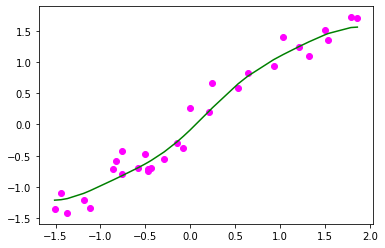

In [18]:
plt.scatter(feature, label, color = 'magenta')
plt.plot(feature,reg.predict(feature), color = 'green')
plt.show()

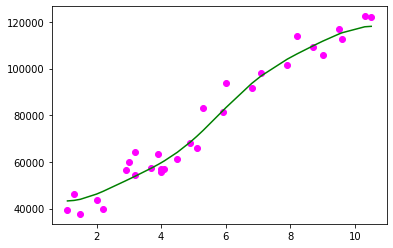

In [23]:
plt.scatter(sc_X.inverse_transform(feature), sc_y.inverse_transform(label), color = 'magenta')
plt.plot(sc_X.inverse_transform(feature), sc_y.inverse_transform(reg.predict(feature)), color = 'green')
plt.show()

In [25]:
pred = reg.predict(sc_X.transform([[4.1]]))
pred

array([-0.57631192])

In [26]:
sc_y.inverse_transform(pred)

array([60469.29008332])

In [27]:
data = pd.read_csv('Bank-data.csv')

In [28]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [29]:
data.shape

(518, 8)

In [30]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [32]:
feature = data.iloc[:,1:7]
label = data['y']

In [49]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
feature = sc_x.fit_transform(feature)

In [50]:
pred = svm.SVC()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
feature_train, feature_test, label_train, label_test = train_test_split(feature, label , test_size = 0.2)

In [53]:
pred.fit(feature_train, label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
pred_score = pred.predict(feature_test)

In [55]:
pred_score

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [56]:
label_predict = pred.predict(feature_test)

In [57]:
label_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(label_predict, label_test)

0.5322338830584706